In [3]:
num_a, num_b = 550, 450
click_a, click_b = 48, 56
rate_a, rate_b = click_a / num_a, click_b / num_b

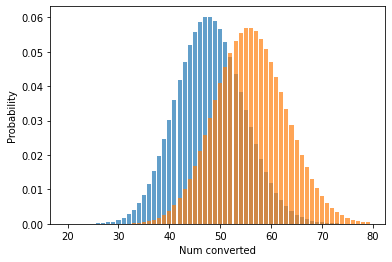

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

# Determine the probability of having x number of click throughs
clicks = np.arange(20, 80)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="A", alpha=0.7)
plt.bar(clicks, prob_b, label="B", alpha=0.7)
plt.xlabel("Num converted"); plt.ylabel("Probability");

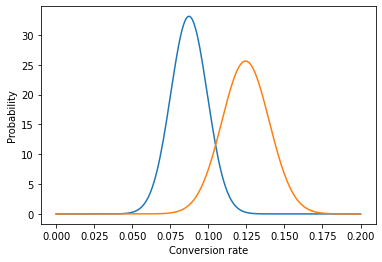

In [5]:
from scipy.stats import norm

# Where does this come from? See the link above.
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

z-score is 1.890, with p-value 0.029


Text(0.02, 5, 'Area=0.971')

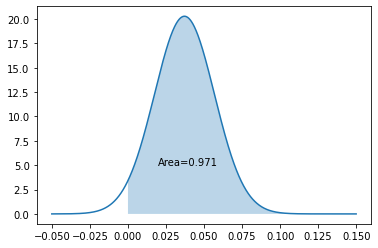

In [6]:
# The z-score is really all we need if we want a number
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
print(f"z-score is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

# But I want a plot as well
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))
x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))

In [7]:
def get_confidence_ab_test(click_a, num_a, click_b, num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.cdf(z_score)

print(get_confidence_ab_test(click_a, num_a, click_b, num_b))


0.9705973498275782


In [8]:
# Draw 10000 samples of possible rates for a and b
n = 10000
rates_a = norm(rate_a, std_a).rvs(n)
rates_b = norm(rate_b, std_b).rvs(n)
b_better = (rates_b > rates_a).mean()
print(f"B is Better than A {b_better:0.1%} of the time")

B is better than A 97.3% of the time
